**Project Name**: Document Image Classification

**Student Name**: MD Ashad Nawab

**Submitted to Pranjal Sir**



In [41]:

import datetime
import os
import pathlib
import random

from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

import tensorflow as tf
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
from tensorflow.keras.applications.vgg16 import preprocess_input

In [42]:
tf.__version__


'2.14.0'

In [43]:

BATCH_SIZE = 16
IMG_SIZE = [224, 224]
CHANNELS = 3
VOCAB_SIZE = 50000
NUM_LABELS = 10
TRAIN_SIZE = 1500
VAL_SIZE = 500

AUTOTUNE = tf.data.AUTOTUNE

In [44]:
temp = tf.zeros([BATCH_SIZE, IMG_SIZE[0], IMG_SIZE[1], CHANNELS])
_ = tf.keras.applications.vgg16.preprocess_input(temp)

In [45]:

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [46]:

def load_and_resize_image(img_path):
  img_raw = tf.io.read_file(img_path)
  img = tf.image.decode_jpeg(img_raw, channels=CHANNELS)
  img = tf.image.resize(img, IMG_SIZE)
  return img


In [47]:
drive.mount('/gdrive')  # access the data set from the google drive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [48]:
def get_file_paths_and_labels(data_root):
  """
  Returns a list of paths to image and text files, corresonding
  class labels and mapping of class names to label index.
  """
  image_paths = sorted([str(path) for path in data_root.glob('*/*.jpg')])
  random.shuffle(image_paths)

  text_paths = [os.path.splitext(path)[0] + '.txt' for path in image_paths]

  label_names = sorted(item.name for item in data_root.glob('*/') if item.is_dir())
  label_to_index = dict((name, index) for index, name in enumerate(label_names))
  labels = [label_to_index[pathlib.Path(path).parent.name] for path in image_paths]

  return image_paths, text_paths, labels, label_to_index



In [49]:
data_root = pathlib.Path('/gdrive/My Drive/Tobacco3482-jpg/Tobacco3482-jpg/')

for item in data_root.iterdir():
  print(item)

/gdrive/My Drive/Tobacco3482-jpg/Tobacco3482-jpg/Report
/gdrive/My Drive/Tobacco3482-jpg/Tobacco3482-jpg/Note
/gdrive/My Drive/Tobacco3482-jpg/Tobacco3482-jpg/News
/gdrive/My Drive/Tobacco3482-jpg/Tobacco3482-jpg/Memo
/gdrive/My Drive/Tobacco3482-jpg/Tobacco3482-jpg/Letter
/gdrive/My Drive/Tobacco3482-jpg/Tobacco3482-jpg/Form
/gdrive/My Drive/Tobacco3482-jpg/Tobacco3482-jpg/Email
/gdrive/My Drive/Tobacco3482-jpg/Tobacco3482-jpg/ADVE
/gdrive/My Drive/Tobacco3482-jpg/Tobacco3482-jpg/Resume
/gdrive/My Drive/Tobacco3482-jpg/Tobacco3482-jpg/Scientific


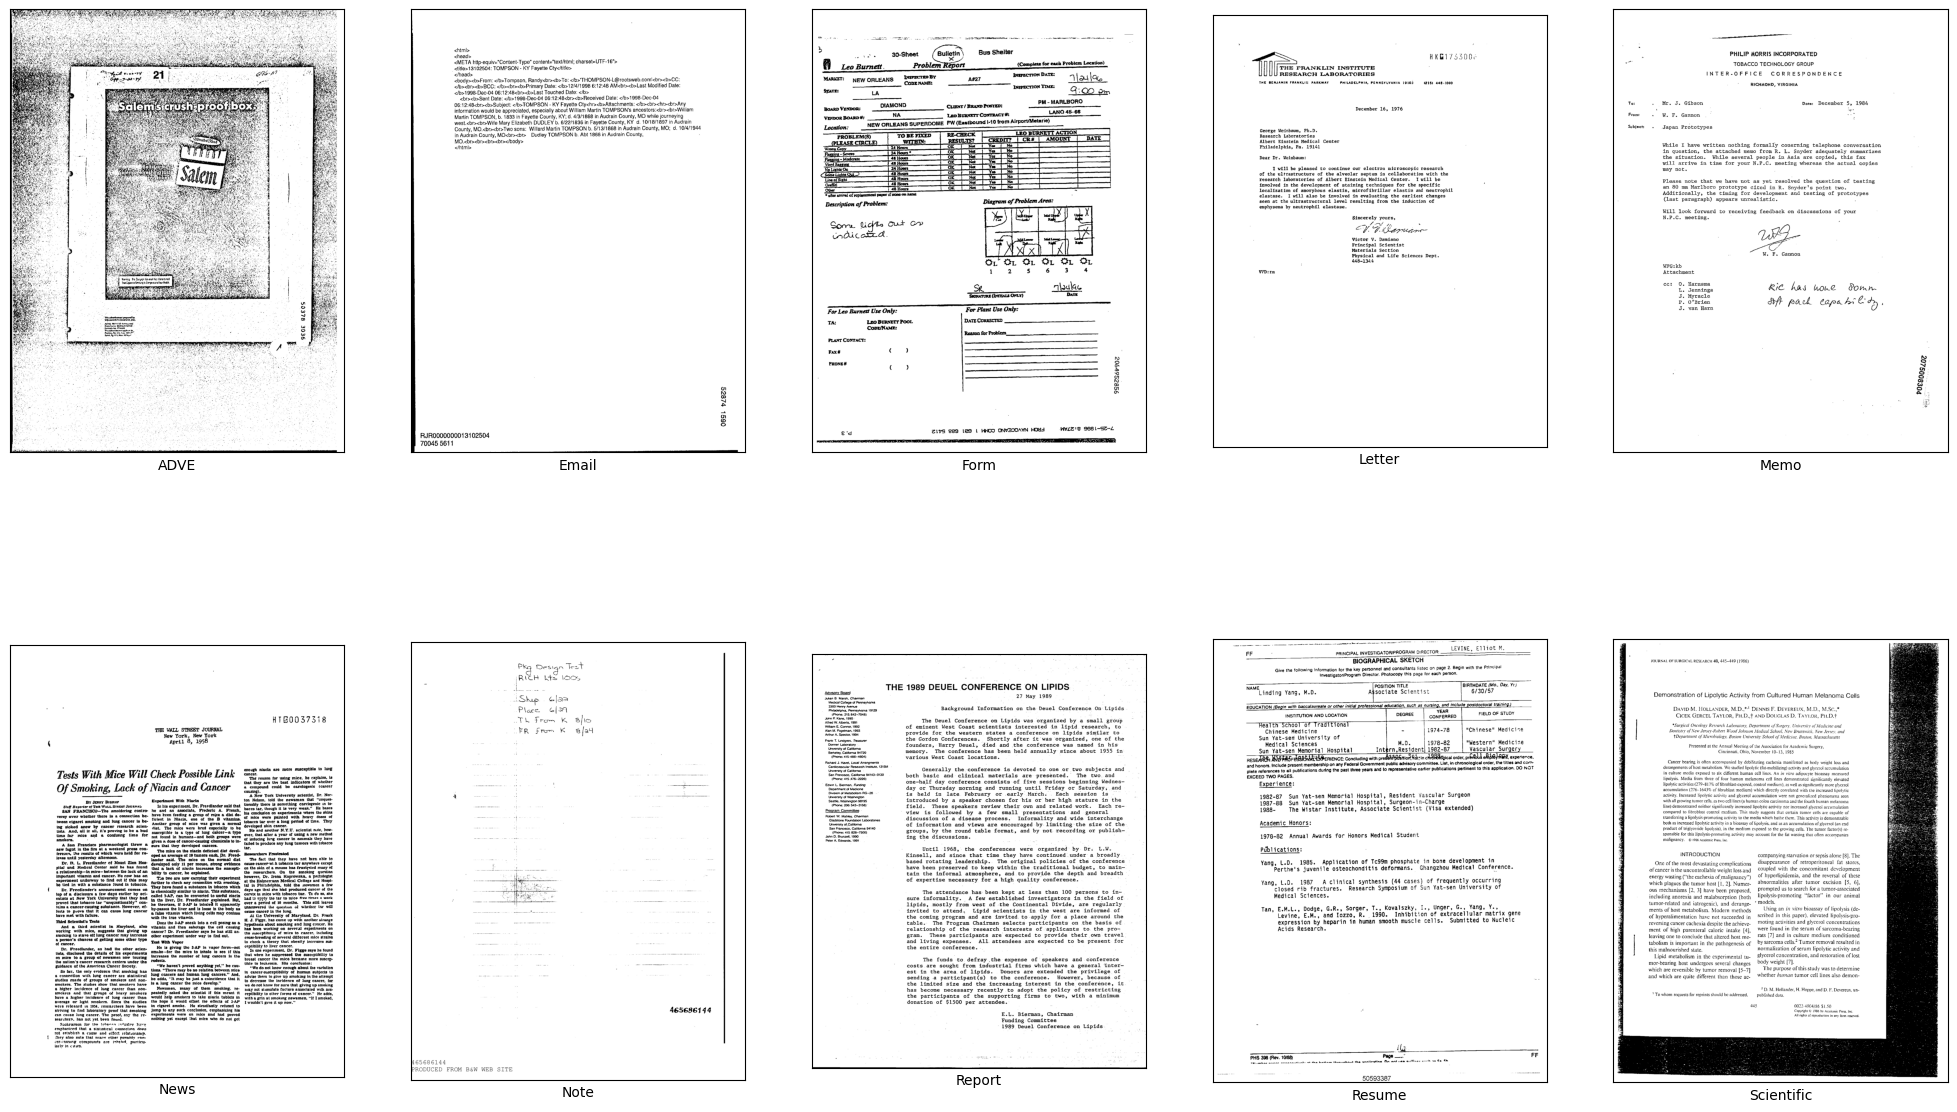

In [50]:

image_paths, text_paths, labels, label_to_index = get_file_paths_and_labels(data_root)

plt.figure(figsize=(25, 15))
for i, (label_name, label_int) in enumerate(label_to_index.items()):
  sample_idx = labels.index(label_int)
  image_path = image_paths[sample_idx]
  img = Image.open(image_path).convert('1')
  plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(img)
  plt.xlabel(label_name)
plt.show()
